In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from reliabilipy import reliability_analysis

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# ANÁLISIS EASI

In [11]:
easi_exp = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/EASI-exp.xlsx')
easi_con = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/EASI-con.xlsx')
X_exp = StandardScaler().fit_transform(easi_exp)
X_con = StandardScaler().fit_transform(easi_con)

## ANÁLISIS FACTORIAL EXPLORATORIO

<Axes: xlabel='Factores', ylabel='EigenValues'>

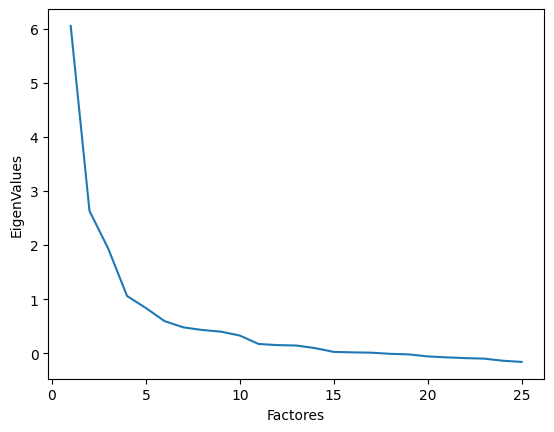

In [12]:
fa = FactorAnalyzer(10, rotation = None)
fa.fit(X_exp)

FactorAnalyzer(bounds = (0.005, 1),
               impute = 'median',
               is_corr_matrix = False,
               method = 'minres',
               n_factors = 3,
               rotation = None,
               rotation_kwargs = {},
               use_smc = True)

factores = range(1, X_exp.shape[1] + 1)
evs = fa.get_eigenvalues()[1]
df = pd.DataFrame({'Factores':factores, 'EigenValues':evs})

sns.lineplot(data = df,
             x = 'Factores',
             y = 'EigenValues')

## ANÁLISIS FACTORIAL CONFIRMATORIO
### BARTLETT

In [20]:
chi_square_value,p_value = calculate_bartlett_sphericity(X_con)
print('Ji cuadrada =', f'{chi_square_value:.3}')
print('p =', f'{p_value:.3}')

Ji cuadrada = 1.83e+03
p = 1.48e-217


### KMO

In [21]:
kmo_all,kmo_model=calculate_kmo(X_con)
print('KMO =', f'{kmo_model:.3}')

KMO = 0.855


In [15]:
fa = FactorAnalyzer(n_factors = 5,
                    rotation = 'oblimin',
                    method = 'minres',
                    use_smc = True)
fa.fit(X_con)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'], index=easi_con.columns)
loadings = loadings.applymap(lambda x:np.nan if abs(x) < 0.3 else x)
loadings = loadings.sort_values(by = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'],
                     ascending = [False, False, False, False, False])
loadings = loadings.replace(np.nan, '', regex = True)
loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
easi6,0.762817,,,,
easi11,0.701939,,,,
easi21,0.681317,,,,
easi1,0.660603,,,,
easi16,0.587984,,,,
easi23,0.366699,,0.3074,,
easi24,,0.867549,,,
easi9,,0.727655,,,
easi14,,0.631683,,,
easi4,,0.567475,,,


### CONFIABILIDAD

In [22]:
ra = reliability_analysis(raw_dataset = easi_con,
                          is_corr_matrix = False,
                          impute = 'median')
ra.fit()

print('Omega total =', f'{ra.omega_total:.3}')
print('Alfa de Cronbach total =', f'{ra.alpha_cronbach:.3}')

Omega total = 0.895
Alfa de Cronbach total = 0.874


# ANÁLISIS ESNOV

In [31]:
esnov_exp = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/ESNOV-exp.xlsx')
esnov_con = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/ESNOV-con.xlsx')
Z_exp = StandardScaler().fit_transform(esnov_exp)
Z_con = StandardScaler().fit_transform(esnov_con)

## ANÁLISIS FACTORIAL EXPLORATORIO

<Axes: xlabel='Factores', ylabel='EigenValues'>

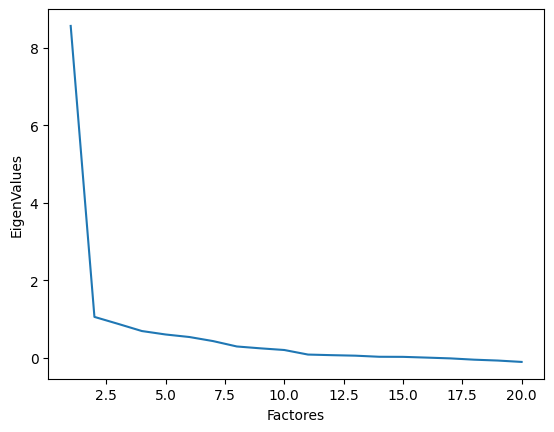

In [32]:
fa = FactorAnalyzer(10, rotation = None)
fa.fit(Z_exp)

FactorAnalyzer(bounds = (0.005, 1),
               impute = 'median',
               is_corr_matrix = False,
               method = 'minres',
               n_factors = 3,
               rotation = None,
               rotation_kwargs = {},
               use_smc = True)

factores = range(1, Z_exp.shape[1] + 1)
evs = fa.get_eigenvalues()[1]
df = pd.DataFrame({'Factores':factores, 'EigenValues':evs})

sns.lineplot(data = df,
             x = 'Factores',
             y = 'EigenValues')

## ANÁLISIS FACTORIAL CONFIRMATORIO

### BARTLETT

In [33]:
chi_square_value,p_value = calculate_bartlett_sphericity(Z_con)
print('Ji cuadrada =', f'{chi_square_value:.3}')
print('p =', f'{p_value:.3}')

Ji cuadrada = 1.88e+03
p = 5.26e-275


### KMO

In [34]:
kmo_all,kmo_model=calculate_kmo(Z_con)
print('KMO =', f'{kmo_model:.3}')

KMO = 0.943


In [35]:
fa = FactorAnalyzer(n_factors = 2,
                    rotation = 'oblimin',
                    method = 'minres',
                    use_smc = True)
fa.fit(Z_con)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index = esnov_con.columns)
loadings = loadings.applymap(lambda x:np.nan if abs(x) < 0.3 else x)
loadings = loadings.sort_values(by = ['Factor 1', 'Factor 2'],
                     ascending = [False, False])
loadings = loadings.replace(np.nan, '', regex = True)
loadings

,Factor 1,Factor 2
esnov15,0.867443,
esnov19,0.670892,
esnov11,0.614014,
esnov17,0.563074,
esnov7,0.517721,
esnov9,0.470812,
esnov16,0.467138,0.324052
esnov14,0.427885,
esnov13,0.40614,
esnov5,0.404267,0.379264


### CONFIABILIDAD

In [36]:
ra = reliability_analysis(raw_dataset = esnov_con,
                          is_corr_matrix = False,
                          impute = 'median')
ra.fit()

print('Omega total =', f'{ra.omega_total:.3}')
print('Alfa de Cronbach total =', f'{ra.alpha_cronbach:.3}')

Omega total = 0.924
Alfa de Cronbach total = 0.93
